# Feature Importance Plot - Cattle

First feature important scores for all four models are imported, merged, and then plotted. Values are ordered based on the best model (i.e., CatBoost).

In [ ]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None) # show all columns in output

# set working directory
os.chdir('C:/Users/Marion Späth/Desktop/ADS/Thesis/Data/ML_training')

# load train and test data (previously created in the ElasticNet notebook)
catboost = pd.read_csv("feature_importance_catboost_cattle.csv")
en = pd.read_csv("feature_importance_elastic_net_cattle.csv")
rf = pd.read_csv("feature_importance_randomforest_cattle.csv")
svm = pd.read_csv("feature_importance_svm_cattle.csv")

en["Model"] = "Elastic Net"
catboost["Model"] = "CatBoost"
rf["Model"] = "Random Forest"
svm["Model"] = "SVM"

svm.head(2)

,feature,importance,Model
0,Afm Language,0.000000,SVM
1,Amh Language,0.000205,SVM


In [20]:
# merge
feature_imp = pd.concat([catboost, en, rf, svm], ignore_index=True)
feature_imp

,feature,importance,Model
0,Adult's Education,0.000164,CatBoost
1,Amh Language,0.001030,CatBoost
2,Irrigated Land,0.001238,CatBoost
3,Expend,0.002379,CatBoost
4,English Language,0.002988,CatBoost
...,...,...,...
75,Trust in VIP,0.028641,SVM
76,Child's Activity,0.035432,SVM
77,Owns Phone,0.039467,SVM
78,Reason Non-Purchase,0.051309,SVM


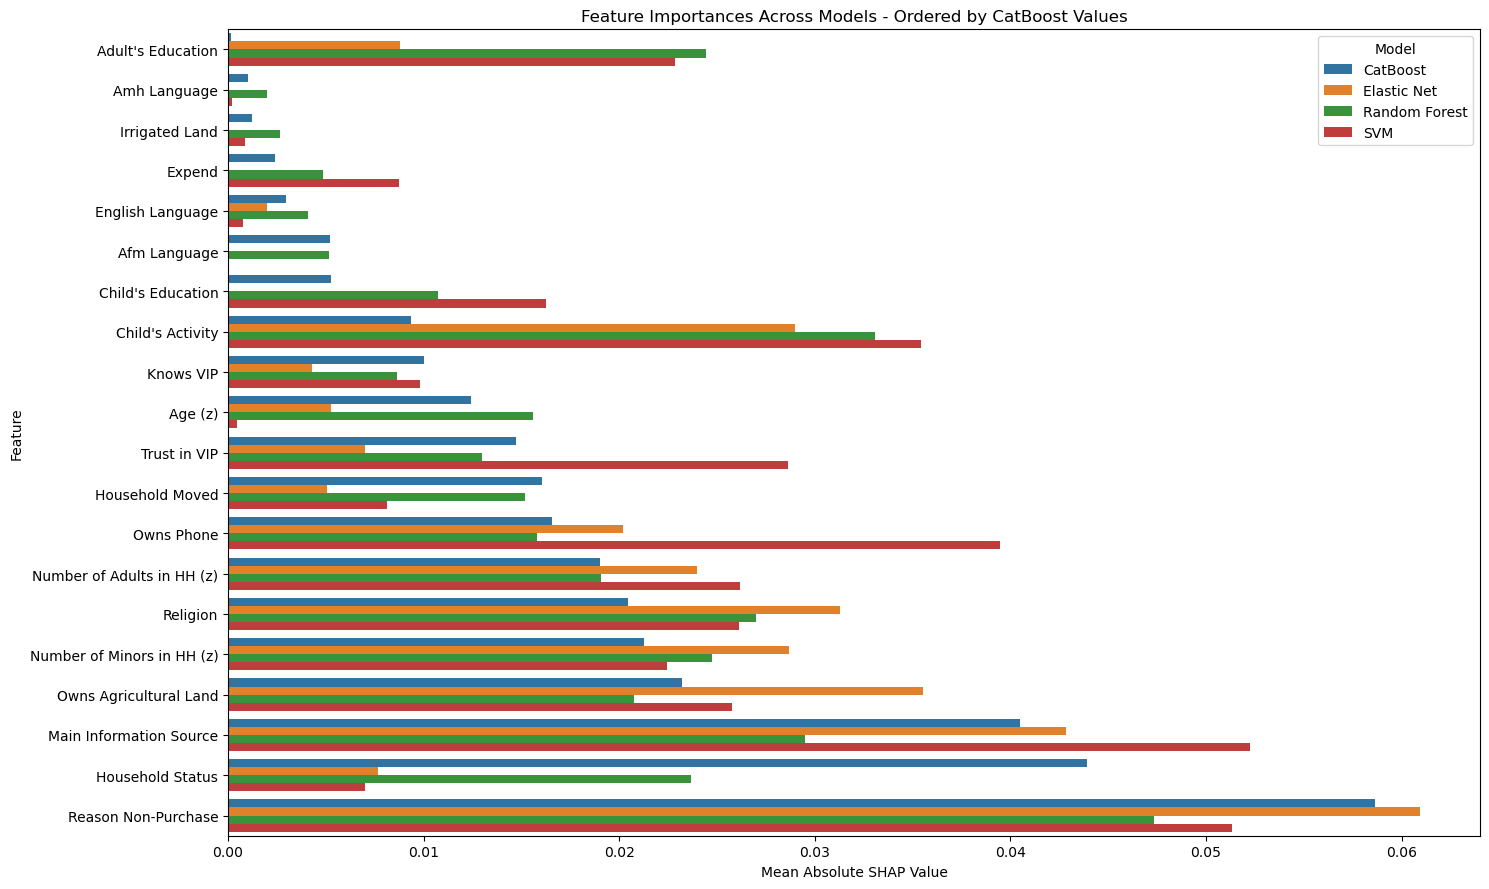

In [ ]:
# Step 1: Filter CatBoost data
catboost_top = feature_imp[feature_imp["Model"] == "CatBoost"].sort_values(
    by="importance", ascending=False
)

# Step 2: Extract top N features based on CatBoost
top_n =50
catboost_top_features = catboost_top["feature"].head(top_n).tolist()

# Step 3: Filter main DataFrame for only those features
top_features_ordered = feature_imp[feature_imp["feature"].isin(catboost_top_features)]

# Step 4: Set feature order for plotting
feature_order = catboost_top_features[::-1]  # reverse for top-down plot

# Step 5: Plot
plt.figure(figsize=(15, 9))
sns.barplot(
    data=top_features_ordered,
    x="importance",
    y="feature",
    hue="Model",
    dodge=True,
    order=feature_order
)
plt.title("Feature Importances Across Models - Ordered by CatBoost Values")
plt.xlabel("Mean Absolute SHAP Value")
plt.ylabel("Feature")
plt.legend(title="Model")
plt.tight_layout()
plt.show()


# Feature Importance Plot - Goat

First feature important scores for all four models are imported, merged, and then plotted. Values are ordered based on the best model (i.e., SVM).

In [25]:
# load train and test data (previously created in the ElasticNet notebook)
catboost = pd.read_csv("feature_importance_catboost_goat.csv")
en = pd.read_csv("feature_importance_elastic_net_goat.csv")
rf = pd.read_csv("feature_importance_randomforest_goat.csv")
svm = pd.read_csv("feature_importance_svm_goat.csv")

en["Model"] = "Elastic Net"
catboost["Model"] = "CatBoost"
rf["Model"] = "Random Forest"
svm["Model"] = "SVM"

feature_imp = pd.concat([catboost, en, rf, svm], ignore_index=True)
feature_imp.head(50)

,feature,importance,Model
0,Afm Language,0.000000,CatBoost
1,Amh Language,0.000000,CatBoost
2,Irrigated Land,0.000000,CatBoost
3,Child's Activity,0.000000,CatBoost
4,English Language,0.000310,CatBoost
5,Child's Education,0.000902,CatBoost
6,Owns Agricultural Land,0.001544,CatBoost
7,Number of Adults in HH (z),0.001966,CatBoost
8,Adult's Education,0.001999,CatBoost
9,Religion,0.002010,CatBoost


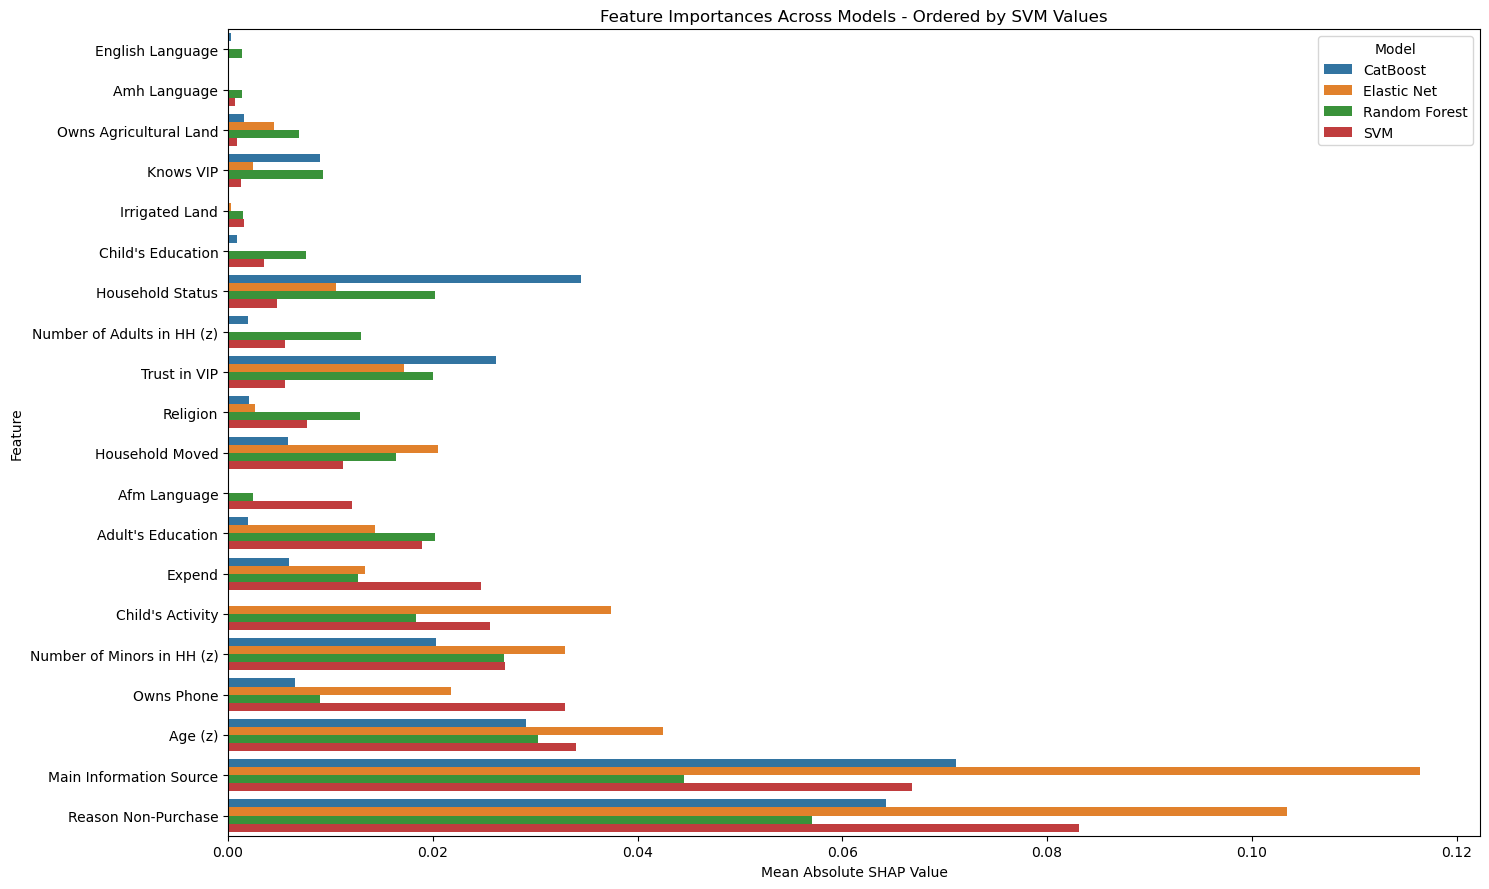

In [23]:
# Step 1: Filter SVM data
SVM_top = feature_imp[feature_imp["Model"] == "SVM"].sort_values(
    by="importance", ascending=False
)

# Step 2: Extract top N features based on SVM
top_n =50
SVM_top_features = SVM_top["feature"].head(top_n).tolist()

# Step 3: Filter main DataFrame for only those features
top_features_ordered = feature_imp[feature_imp["feature"].isin(SVM_top_features)]

# Step 4: Set feature order for plotting
feature_order = SVM_top_features[::-1]  # reverse for top-down plot

# Step 5: Plot
plt.figure(figsize=(15, 9))
sns.barplot(
    data=top_features_ordered,
    x="importance",
    y="feature",
    hue="Model",
    dodge=True,
    order=feature_order
)
plt.title("Feature Importances Across Models - Ordered by SVM Values")
plt.xlabel("Mean Absolute SHAP Value")
plt.ylabel("Feature")
plt.legend(title="Model")
plt.tight_layout()
plt.show()